<div style="background-color:#67b446; color:white; padding:10px; border-radius:5px; text-align:center; font-size:20px;">
    1- UNSUPERVISED LEARNING (KMeans)
</div>

<a id="2"></a> <br>
<span class="label label-default" style="background-color:#67b446; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:24px; color:#FBFAFC; "> About Me</span>

 **<font color=#67b446 style='font-size: 18px; font-weight: bold;' >Author : Yasin Neyestani </font>**

<br>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-green?logo=github)](https://github.com/YasinNeyestanii)


[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-green?logo=linkedin)](https://www.linkedin.com/in/yasin-neyestani/)

<br>

<a id="2"></a> <br>
<span class="label label-default" style="background-color:#67b446; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC; ">About Dataset</span>

The Dataset is named as 'unsupervised Classification' created by Jillani SoftTech . This is a data set that has no target and is suitable for clustering due to properties such as:Balance, Balance Frequency, Purchases and etc link :- https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised

<div style="background-color:#67b446; color:white; padding:10px; border-radius:5px; text-align:center; font-size:20px;">
    2- Import Libraries and Dataset
</div>

In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from kneed import KneeLocator
from sklearn.decomposition import PCA
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv')
df = pd.DataFrame(data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df1 = df.dropna()
df1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df1.drop(['CUST_ID'],axis=1,inplace=True)
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

<div style="background-color:#67b446; color:white; padding:10px; border-radius:5px; text-align:center; font-size:20px;">
    3- Exploratory Data Analysis (EDA)
</div>

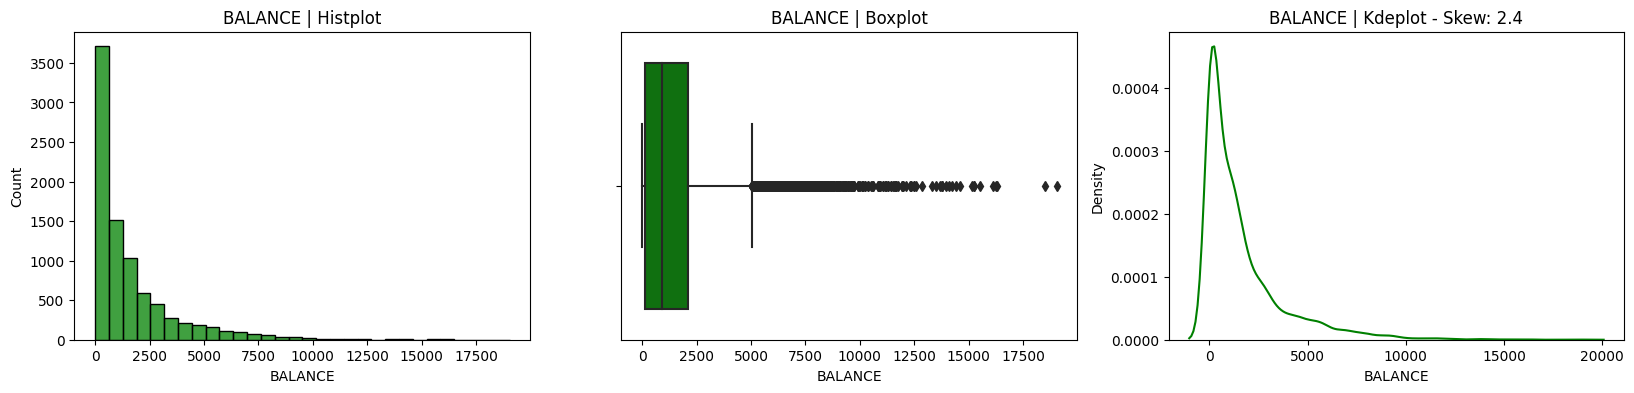

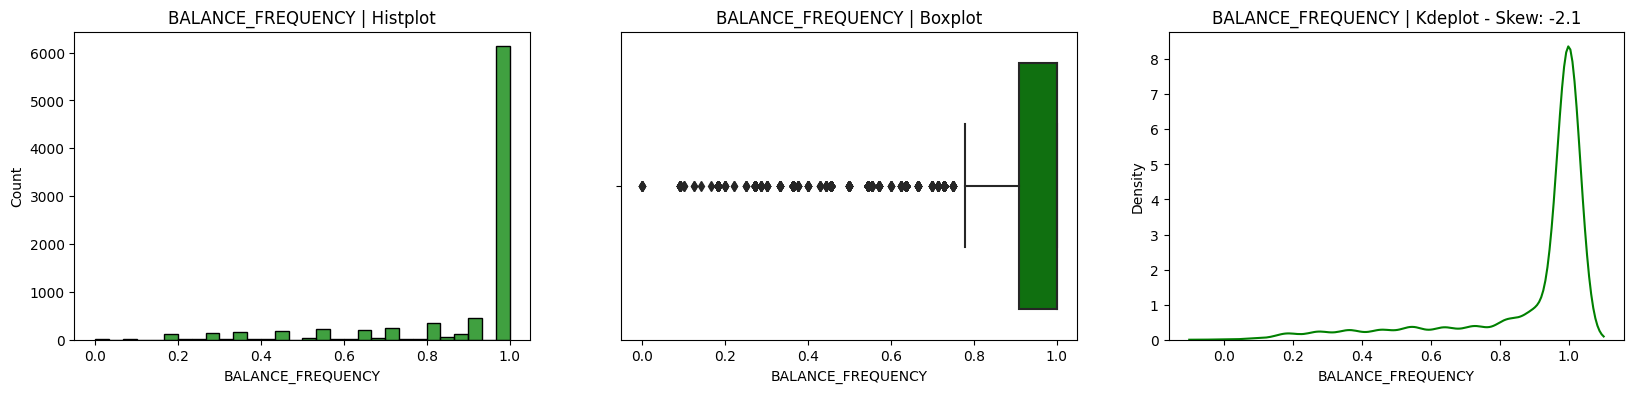

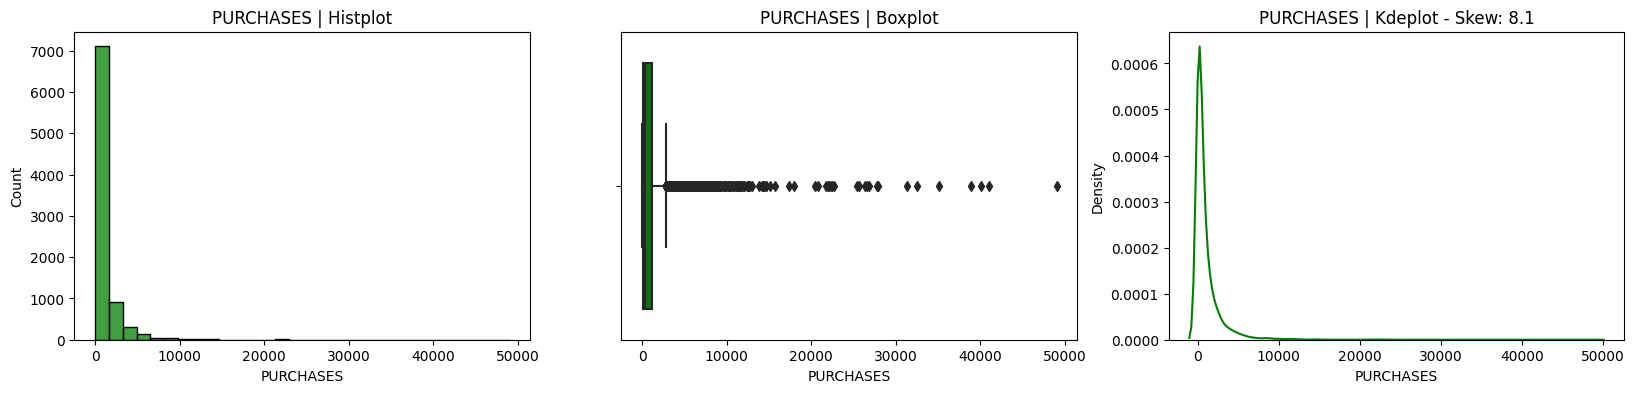

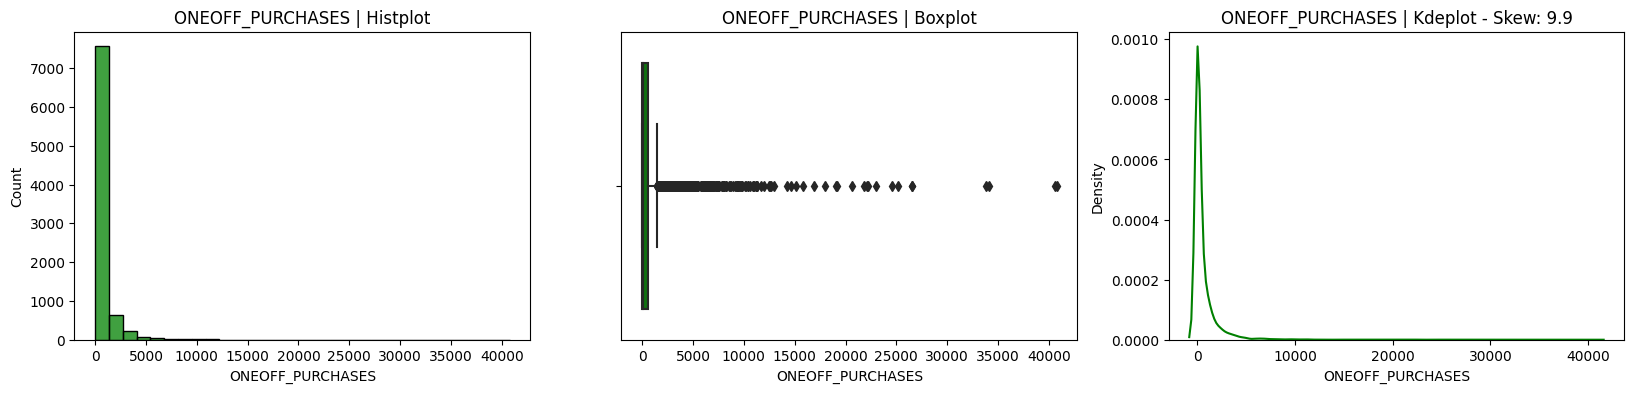

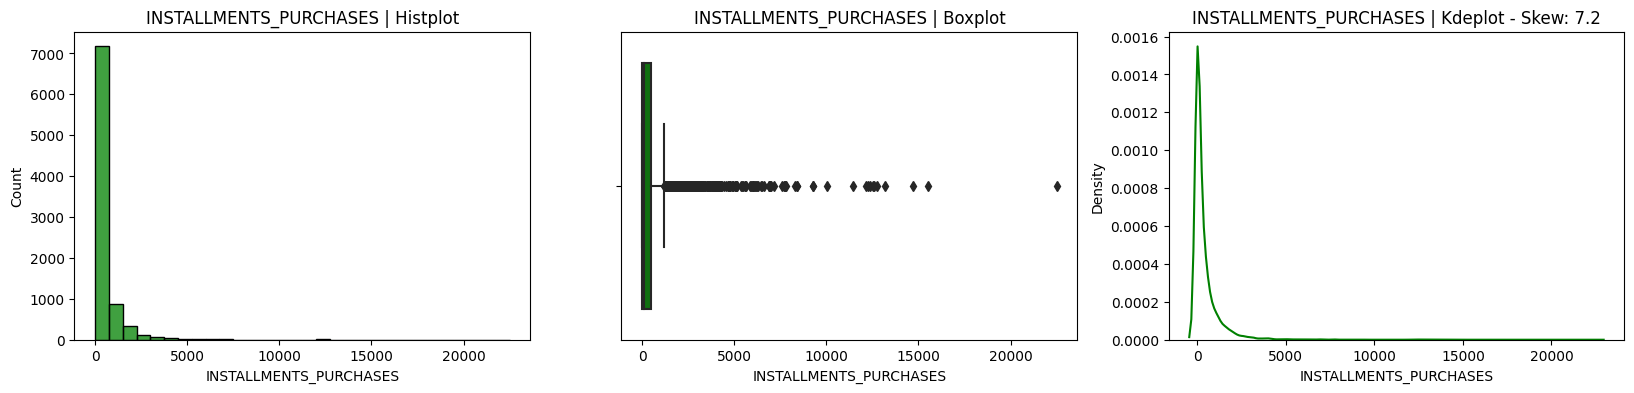

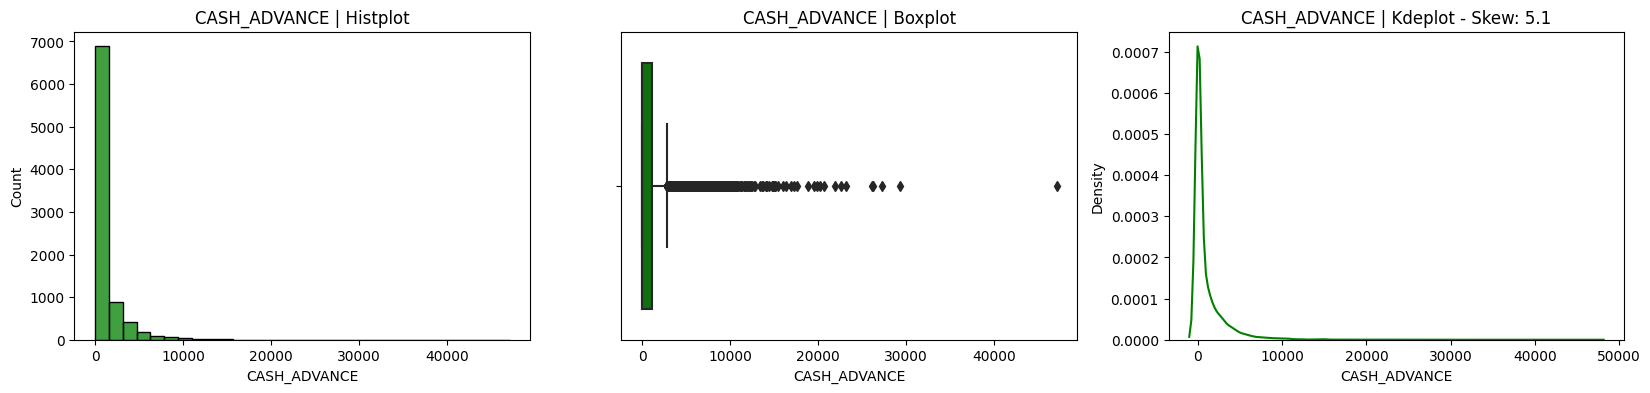

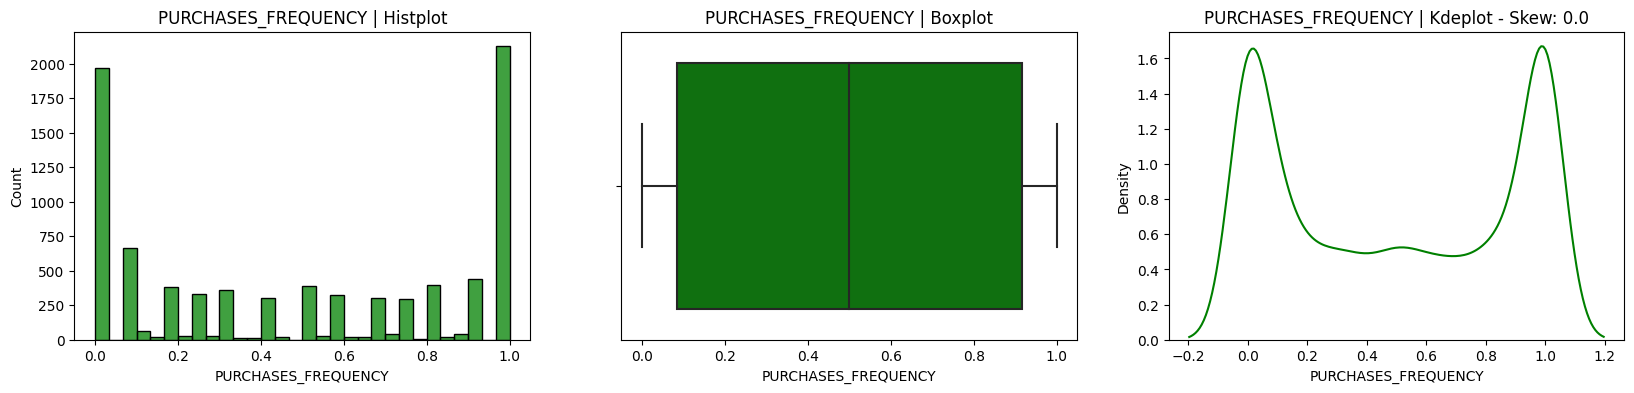

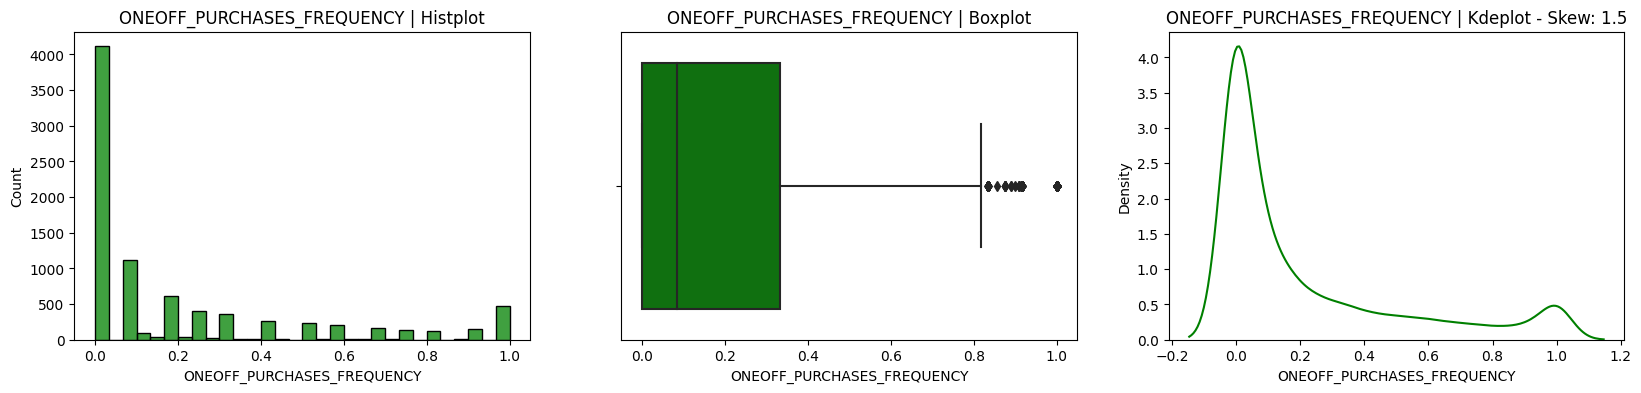

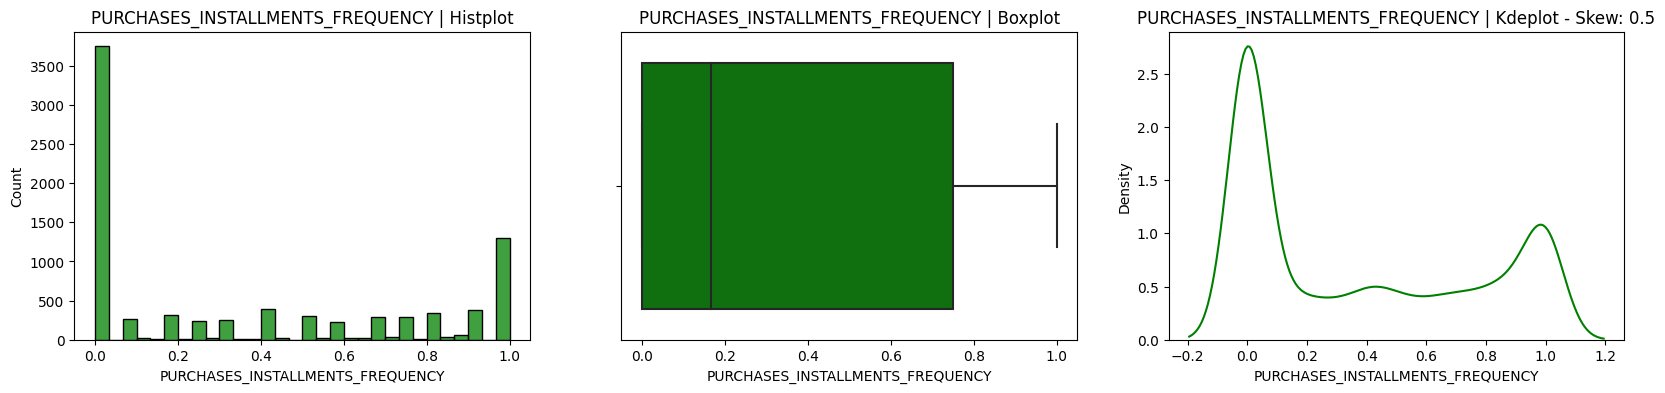

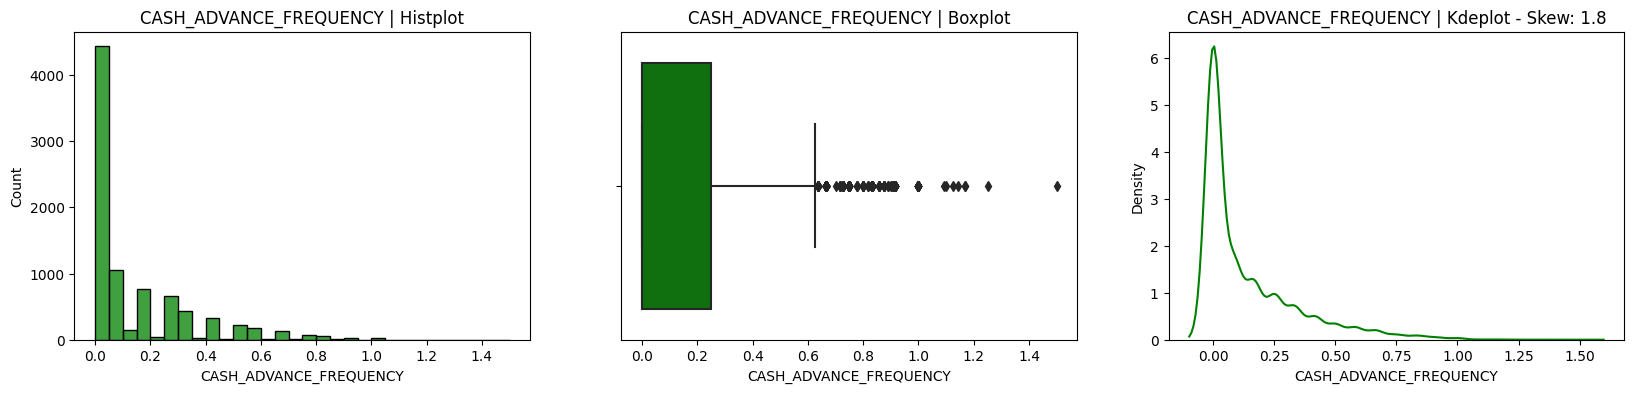

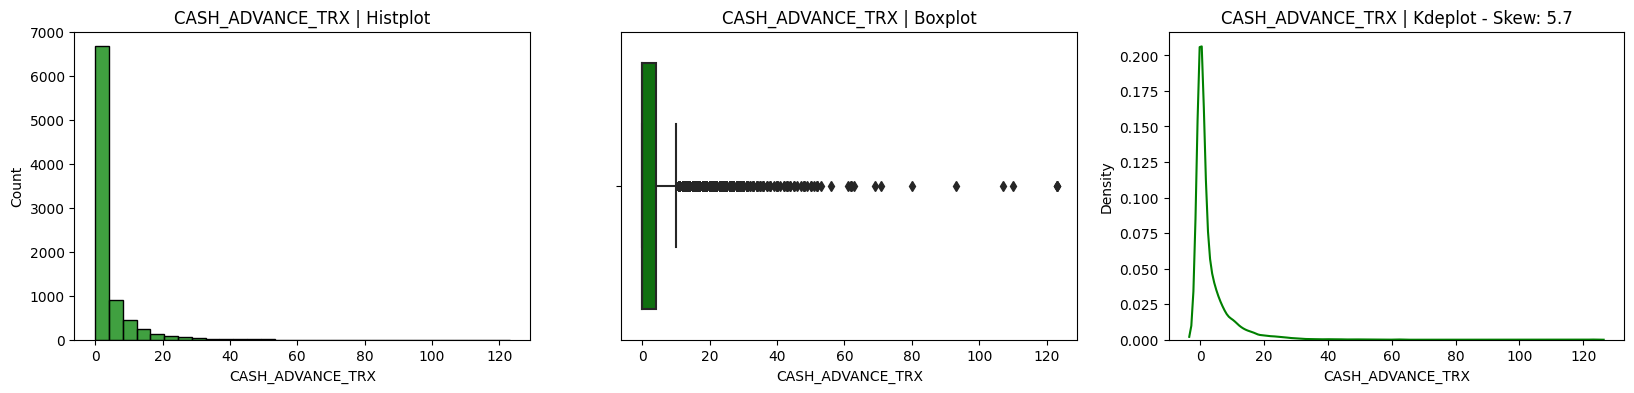

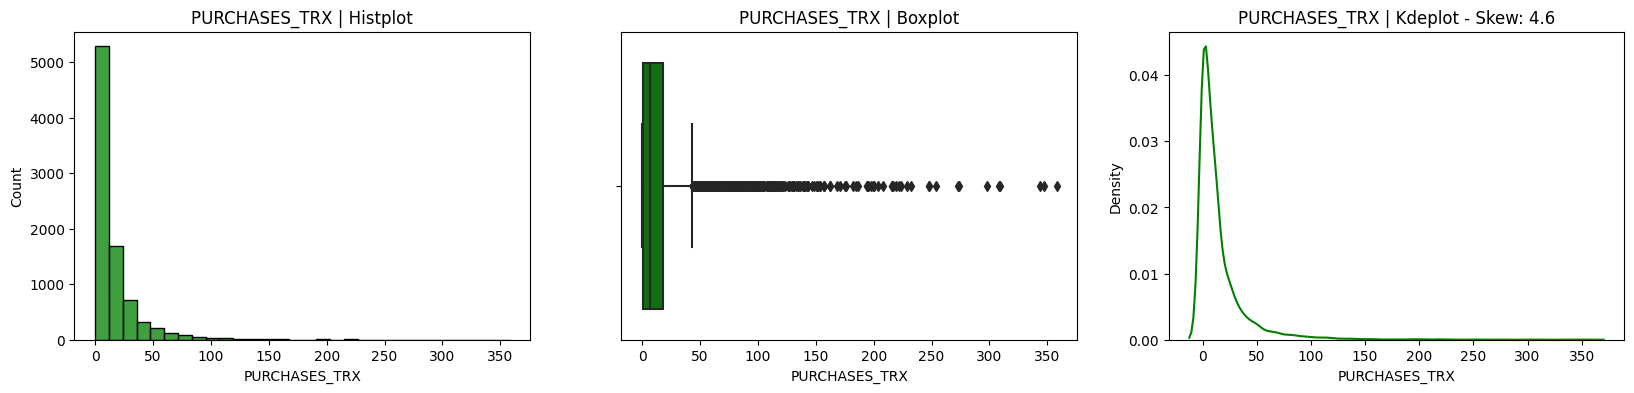

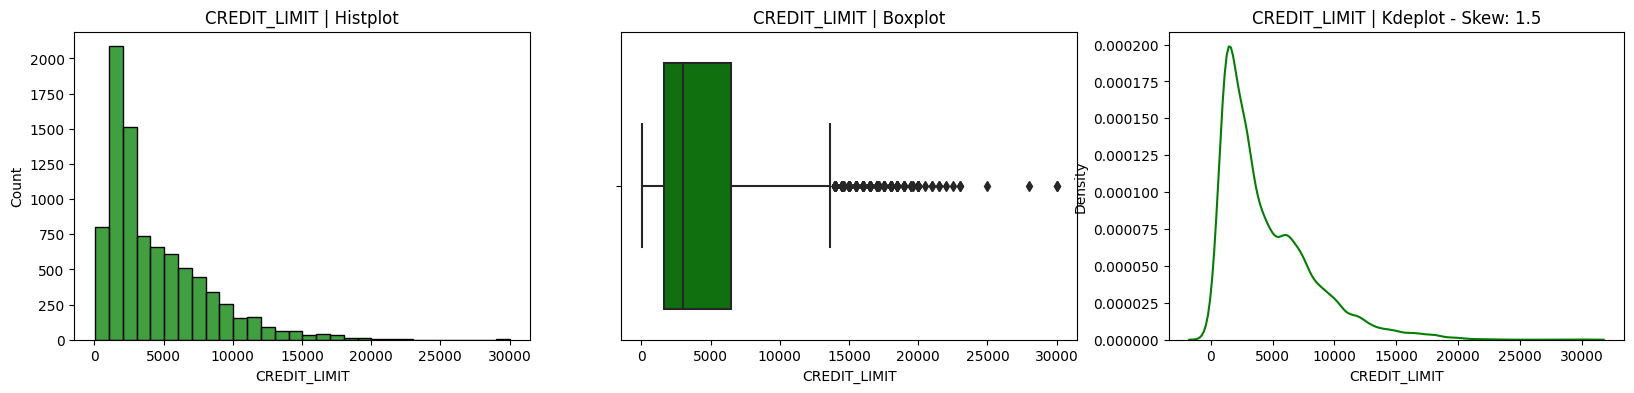

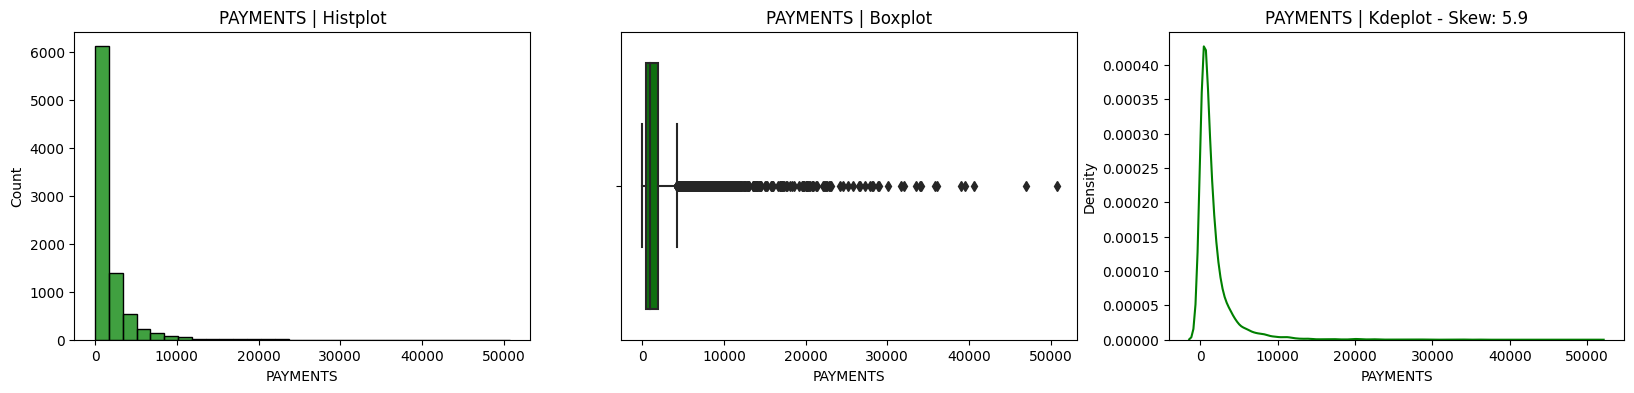

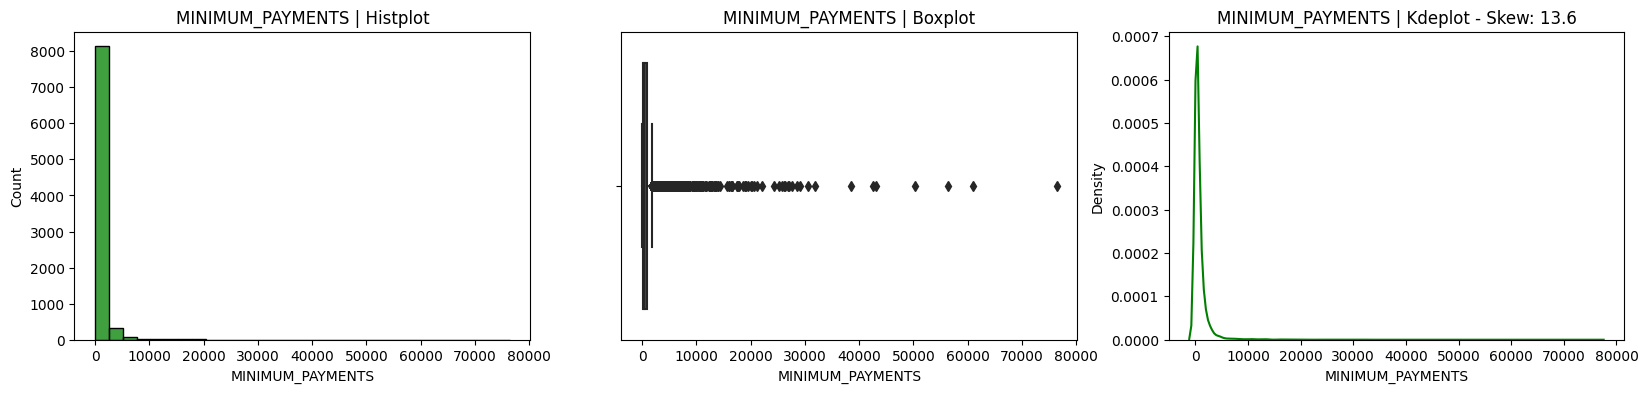

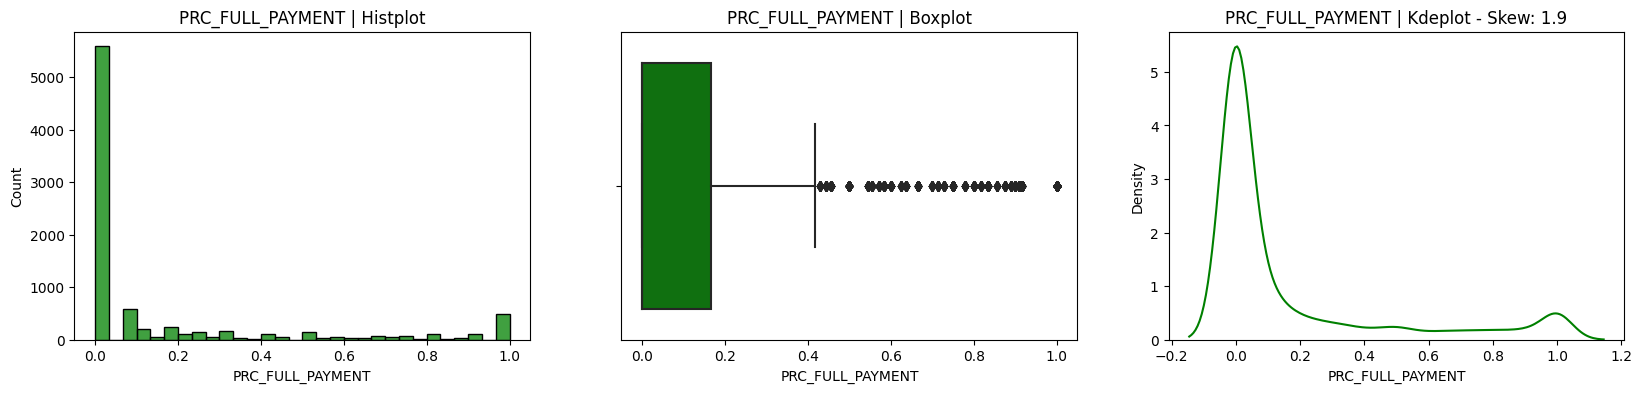

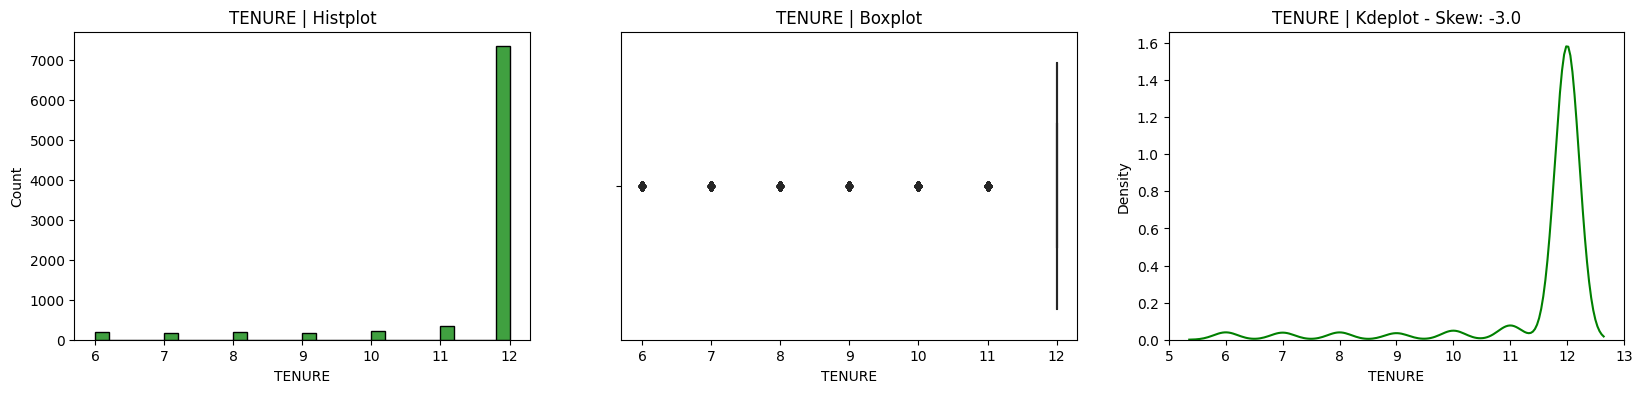

In [10]:
for i in df1.columns[:]:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df1[i],ax=ax[0], bins=30 , color='g')
    sns.boxplot(x=df1[i], ax=ax[1] , color='g')
    sns.kdeplot(df1[i], ax=ax[2], color='g')
    skew_val=round(df1[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

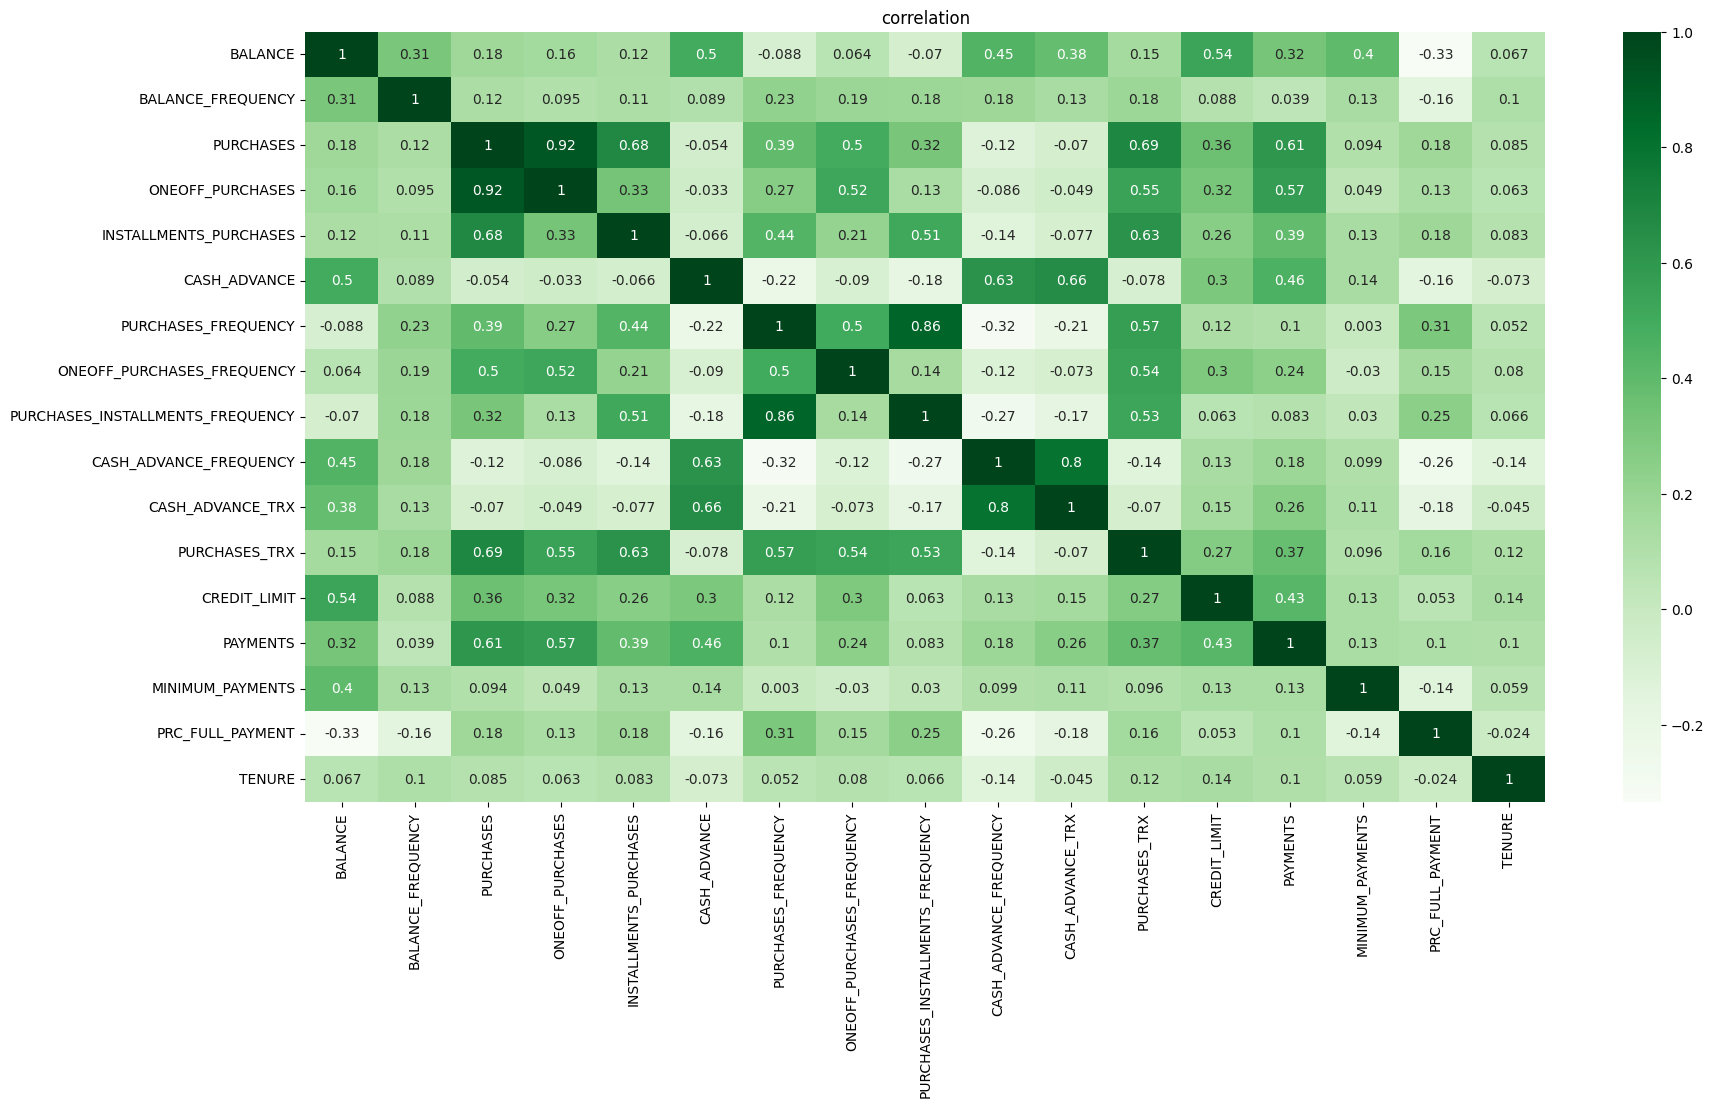

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr() ,  annot=True, cmap="Greens")
plt.title('correlation')
plt.show()

<div style="background-color:#67b446; color:white; padding:10px; border-radius:5px; text-align:center; font-size:20px;">
    4- PCA & Scaling the DataFrame
</div>

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.696395,-1.122582
1,-1.215680,2.435643
2,0.935852,-0.385211
3,-1.614638,-0.724584
4,0.223700,-0.783616
...,...,...
8631,-2.221636,-1.328409
8632,-0.362325,-2.032247
8633,-0.930026,-1.841234
8634,-2.356009,-0.718725


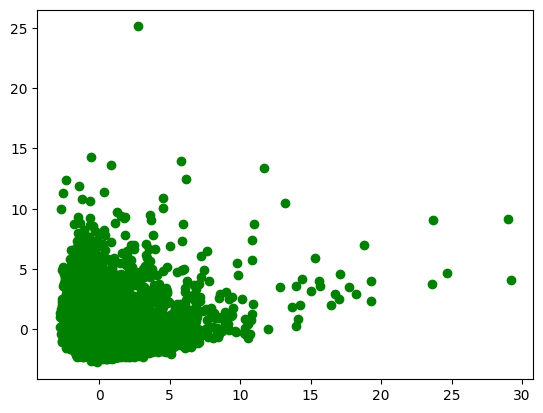

In [14]:
plt.scatter(pca_df['PCA1'],pca_df['PCA2'], color="green")
plt.show()

<div style="background-color:#67b446; color:white; padding:10px; border-radius:5px; text-align:center; font-size:20px;">
    4- Find the best K Value For KMean Model
</div>

In [15]:
inertia = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k , init='random',n_init=10 , max_iter=300,random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

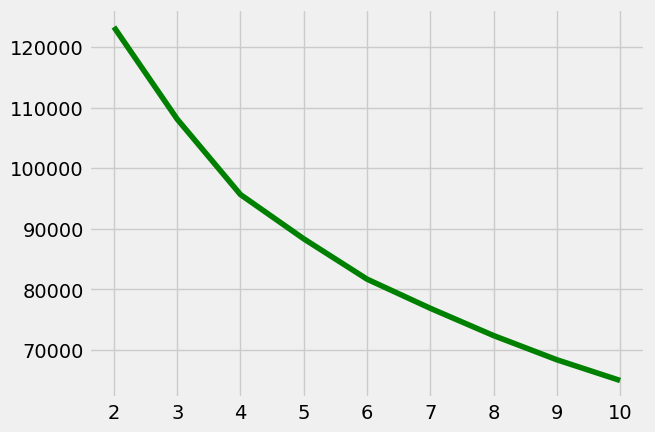

In [16]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),inertia , color="green")
plt.xticks(range(2,11))
plt.show()

In [17]:
kl = KneeLocator(range(2,11),inertia,curve='convex',direction='decreasing')
kl.elbow

5

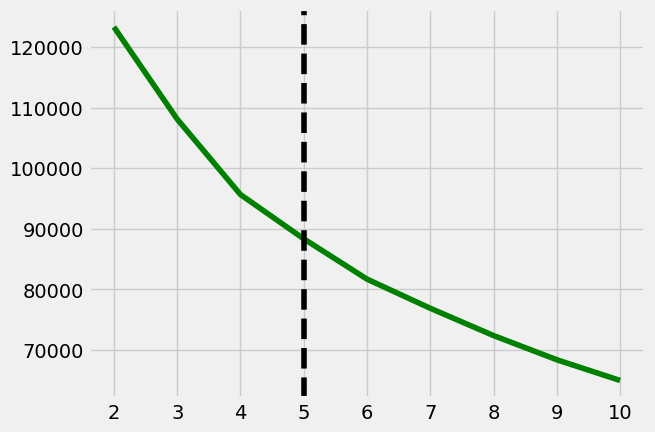

In [18]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),inertia, color="green")
plt.xticks(range(2,11))
plt.axvline(x=kl.elbow,color='black',label='axvline full height',ls='--')
plt.show()

In [19]:
silhouettes = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k , init='random',n_init=10 , max_iter=300,random_state=42)
    kmeans.fit(scaled_features)
    score = metrics.silhouette_score(scaled_features,kmeans.labels_)
    silhouettes.append(score)

([<matplotlib.axis.XTick at 0x7a526b4e76d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

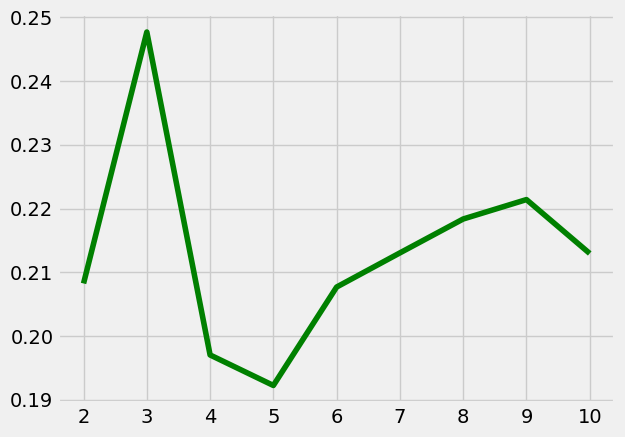

In [20]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouettes, color="green")
plt.xticks(range(2,11))

In [21]:
calinski = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k , init='random',n_init=10 , max_iter=300,random_state=42)
    kmeans.fit(scaled_features)
    score = metrics.calinski_harabasz_score(scaled_features,kmeans.labels_)
    calinski.append(score)

([<matplotlib.axis.XTick at 0x7a526b6365f0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

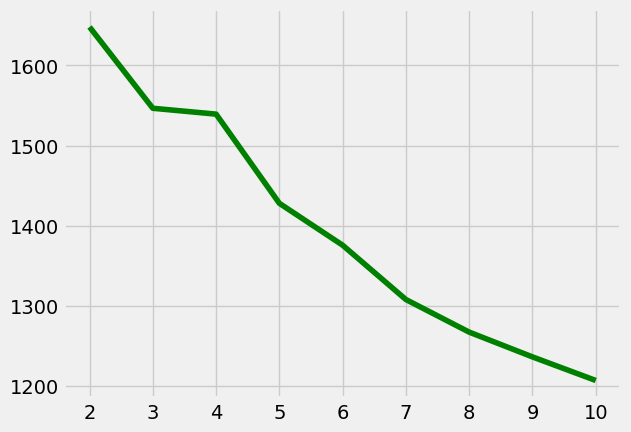

In [22]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),calinski,color="green")
plt.xticks(range(2,11))

<div style="background-color:#67b446; color:white; padding:10px; border-radius:5px; text-align:center; font-size:20px;">
    5- KMean Model
</div>

[[ 3.98448037 -0.02074457]
 [-0.93013669  2.74432936]
 [-0.51587919 -0.81237199]]


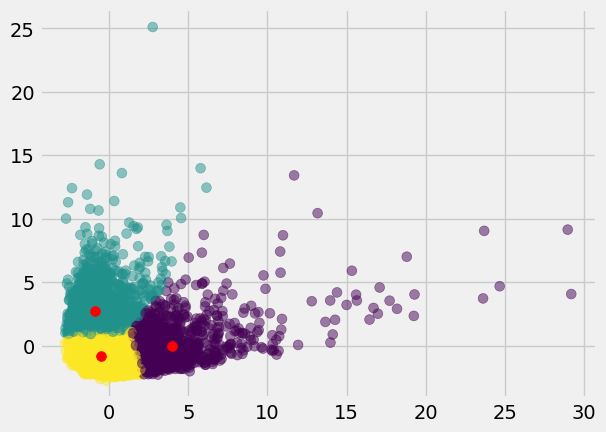

In [23]:
kmeans = KMeans(n_clusters=3, init='random',n_init=10 , max_iter=300,random_state=42).fit(pca_df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(pca_df['PCA1'],pca_df['PCA2'],c=kmeans.labels_.astype(float),s=50,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=50)
plt.show()

In [24]:
final_df = df1.copy()
final_df['Cluster'] = kmeans.labels_
final_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,2
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


<Axes: xlabel='Cluster', ylabel='count'>

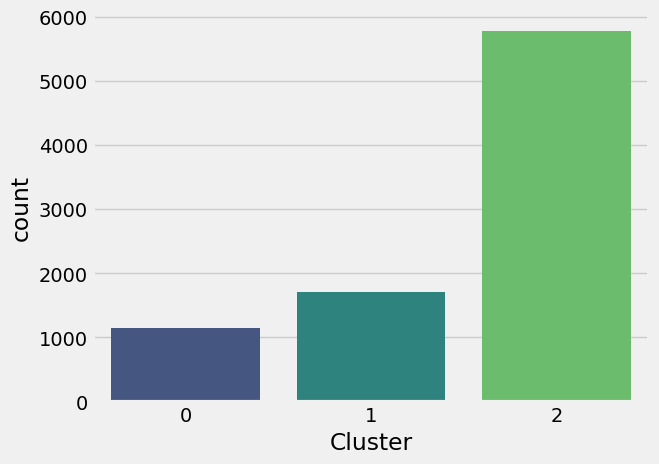

In [25]:
sns.countplot(x='Cluster', data=final_df ,palette = 'viridis')

<div style="background-color:#67b446; color:white; padding:10px; border-radius:5px; text-align:center; font-size:20px;">
    6- Save Data
</div>

In [26]:
final_df.to_csv("Clustered_Customer_Data.csv")